In [5]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import ee
import geemap
import folium
import pprint
from sklearn.preprocessing import OneHotEncoder
from scipy import stats

In [6]:
# ee.Authenticate()

In [7]:
ee.Initialize()

In [8]:
# This function defines a method to add an Earth Engine layer and is nessisary for Folium to work

def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
      tiles=map_id_dict['tile_fetcher'].url_format,
      attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
      name=name,
      overlay=True,
      control=True
  ).add_to(self)

folium.Map.add_ee_layer = add_ee_layer

In [9]:
# Polygons and Image Collections

# Import AOI polygons as geo pandas dataframes and convert to EE objects
# These polygons can be changed to represent any class

AOI_mine = gpd.read_file("//Users/Arron/Documents/GitHub/Philippines/Shape/Mine/Mine.shp")
boundary_mine = geemap.geopandas_to_ee(AOI_mine)

AOI_natural = gpd.read_file("//Users/Arron/Documents/GitHub/Philippines/Shape/Natural/Natural.shp")
boundary_natural = geemap.geopandas_to_ee(AOI_natural)

AOI_other = gpd.read_file("//Users/Arron/Documents/GitHub/Philippines/Shape/Other/Other.shp")
boundary_other = geemap.geopandas_to_ee(AOI_other)

AOI_other2 = gpd.read_file("//Users/Arron/Documents/GitHub/Philippines/Shape/Other2/Other2.shp")
boundary_other2 = geemap.geopandas_to_ee(AOI_other2)

AOI_total = gpd.read_file("//Users/Arron/Documents/GitHub/Philippines/Shape/Total/Total.shp")
boundary_total = geemap.geopandas_to_ee(AOI_total)

l5 = ee.ImageCollection("LANDSAT/LT05/C01/T1_TOA")
l7 = ee.ImageCollection("LANDSAT/LE07/C01/T1_TOA")

In [10]:
# Start and End Dates

# These are the start and end datas for each quaterly composite

start = ['2005-01-01','1989-04-01','1989-07-01','1989-10-01','1990-01-01','1990-04-01','1990-07-01','1990-10-01','1991-01-01','1991-04-01','1991-07-01','1991-10-01','1992-01-01','1992-04-01','1992-07-01','1992-10-01','1993-01-01','1993-04-01','1993-07-01','1993-10-01','1994-01-01','1994-04-01','1994-07-01','1994-10-01','1995-01-01','1995-04-01','1995-07-01','1995-10-01','1996-01-01','1996-04-01','1996-07-01','1996-10-01','1997-01-01','1997-04-01','1997-07-01','1997-10-01','1998-01-01','1998-04-01','1998-07-01','1998-10-01','1999-01-01','1999-04-01','1999-07-01','1999-10-01','2000-01-01','2000-04-01','2000-07-01','2000-10-01','2001-01-01','2001-04-01','2001-07-01','2001-10-01','2002-01-01','2002-04-01','2002-07-01','2002-10-01','2003-01-01','2003-04-01','2003-07-01','2003-10-01','2004-01-01','2004-04-01','2004-07-01','2004-10-01','2005-01-01','2005-04-01','2005-07-01','2005-10-01','2006-01-01','2006-04-01','2006-07-01','2006-10-01','2007-01-01','2007-04-01','2007-07-01','2007-10-01','2008-01-01','2008-04-01','2008-07-01','2008-10-01','2009-01-01','2009-04-01','2009-07-01','2009-10-01','2010-01-01','2010-04-01','2010-07-01','2010-10-01','2011-01-01','2011-04-01','2011-07-01','2011-10-01','2012-01-01','2012-04-01','2012-07-01','2012-10-01','2013-01-01','2013-04-01','2013-07-01','2013-10-01','2014-01-01','2014-04-01','2014-07-01','2014-10-01','2015-01-01','2015-04-01','2015-07-01','2015-10-01','2016-01-01','2016-04-01','2016-07-01','2016-10-01','2017-01-01','2017-04-01','2017-07-01','2017-10-01','2018-01-01','2018-04-01','2018-07-01','2018-10-01','2019-01-01','2019-04-01','2019-07-01','2019-10-01','2020-01-01','2020-04-01','2020-07-01','2020-10-01','2021-01-01','2021-04-01','2021-07-01','2021-10-01','2022-01-01','2022-04-01','2022-07-01','2022-10-01']
end = ['2005-03-30','1989-06-30','1989-09-30','1989-12-30','1990-03-30','1990-06-30','1990-09-30','1990-12-30','1991-03-30','1991-06-30','1991-09-30','1991-12-30','1992-03-30','1992-06-30','1992-09-30','1992-12-30','1993-03-30','1993-06-30','1993-09-30','1993-12-30','1994-03-30','1994-06-30','1994-09-30','1994-12-30','1995-03-30','1995-06-30','1995-09-30','1995-12-30','1996-03-30','1996-06-30','1996-09-30','1996-12-30','1997-03-30','1997-06-30','1997-09-30','1997-12-30','1998-03-30','1998-06-30','1998-09-30','1998-12-30','1999-03-30','1999-06-30','1999-09-30','1999-12-30','2000-03-30','2000-06-30','2000-09-30','2000-12-30','2001-03-30','2001-06-30','2001-09-30','2001-12-30','2002-03-30','2002-06-30','2002-09-30','2002-12-30','2003-03-30','2003-06-30','2003-09-30','2003-12-30','2004-03-30','2004-06-30','2004-09-30','2004-12-30','2005-03-30','2005-06-30','2005-09-30','2005-12-30','2006-03-30','2006-06-30','2006-09-30','2006-12-30','2007-03-30','2007-06-30','2007-09-30','2007-12-30','2008-03-30','2008-06-30','2008-09-30','2008-12-30','2009-03-30','2009-06-30','2009-09-30','2009-12-30','2010-03-30','2010-06-30','2010-09-30','2010-12-30','2011-03-30','2011-06-30','2011-09-30','2011-12-30','2012-03-30','2012-06-30','2012-09-30','2012-12-30','2013-03-30','2013-06-30','2013-09-30','2013-12-30','2014-03-30','2014-06-30','2014-09-30','2014-12-30','2015-03-30','2015-06-30','2015-09-30','2015-12-30','2016-03-30','2016-06-30','2016-09-30','2016-12-30','2017-03-30','2017-06-30','2017-09-30','2017-12-30','2018-03-30','2018-06-30','2018-09-30','2018-12-30','2019-03-30','2019-06-30','2019-09-30','2019-12-30','2020-03-30','2020-06-30','2020-09-30','2020-12-30','2021-03-30','2021-06-30','2021-09-30','2021-12-30','2022-03-30','2022-06-30','2022-09-30','2022-12-30',]

In [11]:
# Vis Params

lsvis = {
    'bands': ['B3', 'B2', 'B1'], 
    'min': 0, 
    'max': 0.3, 
    'gamma': 1.2
};

In [12]:
# Define Create Blank DF Function

# This function takes and image collection (L5/L7), start and end datas and a boundary polygon and creates an empty dataframe 
# with the same coloumn headings as the yearly dataframes and sets values to 0
# This is to help fix a bug with null values in spectral band coloumns in the next funtion

def get_blank_df(image_collection, start_dates, end_dates, boundary):
    filtered_collection = image_collection.filter(ee.Filter.date(start_dates[0], end_dates[0])).select('B.*')
    composite = filtered_collection.median().clip(boundary)
    random_points = geemap.random_sampling(composite, boundary, numPixels=1000, scale=30)
    blank_df = geemap.ee_to_pandas(random_points)
    for col in blank_df.columns:
        blank_df[col].values[:] = 0
    return blank_df


In [13]:
# Define function to create yearly dataframes

# This function returns a dataframe containing the spectral values of quaterly bands for a year

def get_year_data(image_collection, start_dates, end_dates, i, boundary, blank_df, suffix_list, year_df, bad_vals, off_set):
    
    filtered_collection = image_collection.filter(ee.Filter.date(start_dates[i+off_set], end_dates[i+off_set])).select('B.*')
    composite = filtered_collection.median().clip(boundary)
            
    if i in bad_vals: # Change to be if comp is empty
        year_df = year_df.merge(blank_df, left_index=True, right_index=True, how='outer',suffixes=('', suffix[i]))
    
    else:
        random_points = geemap.random_sampling(composite, boundary, numPixels=1000, scale=30)
        quater_df = geemap.ee_to_pandas(random_points)
        year_df = year_df.merge(quater_df, left_index=True, right_index=True, how='outer',suffixes=('', suffix[i]))
    
    return year_df


In [14]:
# Define function to create total dataframes

# This function returns the total datafram for the time series using the pre defined 'get_year_data' function

def get_data(image_collection, start_dates, end_dates, boundary, blank_df, bad_vals, input_class, off_set):
    
    total_df = pd.DataFrame()
    year_df = pd.DataFrame()
    
    for i in range(16): # Change to be length start when comp is empty bool 
        if i == 0 or i%4 == 0:
            total_df = total_df.append(year_df)      # If multiple of 4 add year_df and clear year_df
            year_df = pd.DataFrame()
            
            year_df = get_year_data(image_collection, start_dates, end_dates, i, boundary, blank_df, suffix, year_df, bad_vals, off_set)
        
        else:
            year_df = get_year_data(image_collection, start_dates, end_dates, i, boundary, blank_df, suffix, year_df, bad_vals, off_set)
        
    total_df = total_df.append(year_df)     # Add final year_df
    total_df['Class'] = input_class
    
    return total_df

In [15]:
# Create Blank DataFrames

blank_l5_mine = get_blank_df(l5,start,end,boundary_mine)
blank_l7_mine = get_blank_df(l7,start,end,boundary_mine)

blank_l5_natural = get_blank_df(l5,start,end,boundary_natural)
blank_l7_natural = get_blank_df(l7,start,end,boundary_natural)

blank_l5_other = get_blank_df(l5,start,end,boundary_other)
blank_l7_other = get_blank_df(l7,start,end,boundary_other)

blank_l5_other2 = get_blank_df(l5,start,end,boundary_other2)
blank_l7_other2 = get_blank_df(l7,start,end,boundary_other2)

blank_l5_total = get_blank_df(l5,start,end,boundary_total)
blank_l7_total = get_blank_df(l7,start,end,boundary_total)

In [16]:
# Create Column Suffix List

suffix = ['_Q1','_Q2','_Q3','_Q4']*50      # Love Python haha

In [17]:
# Create Dataframes

total_l5_mine = get_data(l5, start, end, boundary_mine, blank_l5_mine, {2,7,8,9,13,14}, 'Mine', 0)
total_l7_mine = get_data(l7, start, end, boundary_mine, blank_l7_mine, {0,4}, 'Mine', 44)

total_l5_natural = get_data(l5, start, end, boundary_natural, blank_l5_natural, {2,7,8,9,13,14}, 'Natural', 0)
total_l7_natural = get_data(l7, start, end, boundary_natural, blank_l7_natural, {0,4}, 'Natural', 44)

total_l5_other = get_data(l5, start, end, boundary_other, blank_l5_other, {2,7,8,9,13,14}, 'Other', 0)
total_l7_other = get_data(l7, start, end, boundary_other, blank_l7_other, {0,4}, 'Other', 44)

total_l5_other2 = get_data(l5, start, end, boundary_other2, blank_l5_other2, {2,7,8,9,13,14}, 'Other', 0)
total_l7_other2 = get_data(l7, start, end, boundary_other2, blank_l7_other2, {0,4}, 'Other', 44)

total_l5_total = get_data(l5, start, end, boundary_total, blank_l5_total, {2,7,8,9,13,14}, 'Total', 0)
total_l7_total = get_data(l7, start, end, boundary_total, blank_l7_total, {0,4}, 'Total', 44)

In [18]:
# Create Master Dataframe

master_data = pd.concat([total_l5_mine, total_l7_mine, 
                         total_l5_natural, total_l7_natural, 
                         total_l5_other, total_l7_other, 
                         total_l5_other2, total_l7_other2])

master_data

,B2,B3,B4,B5,BQA,B6,B7,B1,B2_Q2,B3_Q2,...,B8,B6_VCID_2_Q2,B6_VCID_1_Q2,B8_Q2,B6_VCID_2_Q3,B6_VCID_1_Q3,B8_Q3,B6_VCID_2_Q4,B6_VCID_1_Q4,B8_Q4
0,0.090883,0.093435,0.118382,0.159485,672,294.211334,0.113290,0.102001,0.192668,0.195333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.080982,0.077800,0.112856,0.152185,672,294.652130,0.108184,0.094929,0.199698,0.207080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.095279,0.098598,0.122612,0.172073,672,294.211334,0.122140,0.105517,0.193464,0.204509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.088331,0.092600,0.120779,0.169465,672,294.211334,0.116753,0.098511,0.195455,0.204424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.089961,0.097050,0.121114,0.179218,672,294.652130,0.127143,0.096720,0.215055,0.222914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,0.075257,0.220695,0.337078,0.170639,672,NaN,0.143737,0.086282,0.375353,0.355437,...,0.168500,293.123688,292.888336,0.430791,284.700012,284.179718,0.237849,248.411606,248.305023,0.351542
37,0.073584,0.203946,0.282043,0.158797,672,NaN,0.072760,0.084796,0.328250,0.331072,...,0.137938,293.123688,292.888336,0.370442,284.387146,284.179718,0.208180,248.874573,249.138962,0.351168
38,0.080275,0.217015,0.326294,0.179261,672,NaN,0.092146,0.090742,0.374054,0.355437,...,0.143543,293.413422,293.411285,0.422919,284.387146,284.179718,0.221666,248.874573,249.138962,0.341749
39,0.073584,0.217015,0.303259,0.179261,672,NaN,0.087299,0.085793,0.331303,0.335410,...,0.133469,292.833252,292.888336,0.359947,284.387146,284.179718,0.208180,NaN,NaN,NaN


In [19]:
# Drop Columns Not Shared by L5 and L7

master_data = master_data.drop(['BQA','BQA_Q2','BQA_Q3','BQA_Q4',
                                'B6','B6_Q2','B6_Q3','B6_Q4',
                                'B6_VCID_1','B6_VCID_1_Q2','B6_VCID_1_Q3','B6_VCID_1_Q4',
                                'B6_VCID_2','B6_VCID_2_Q2','B6_VCID_2_Q3','B6_VCID_2_Q4',
                                'B8','B8_Q2','B8_Q3','B8_Q4'], axis=1)

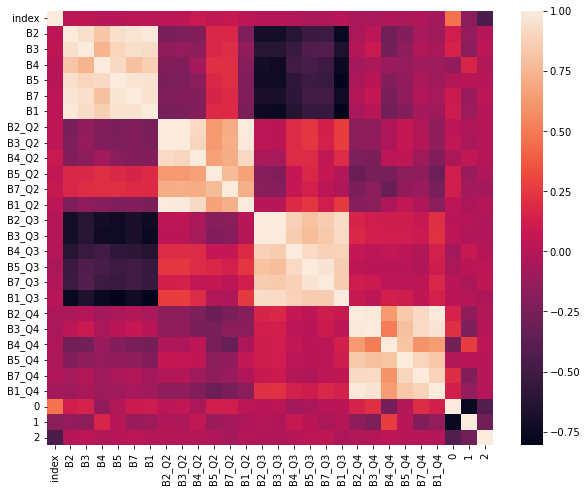

In [20]:
# Plot Band Correlation

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(master_data[['Class']]).toarray())
encode_df = pd.concat([master_data.reset_index(), encoder_df], axis=1)

fig = plt.figure(figsize=(10,8))
sns.heatmap(data=encode_df.corr());
plt.plot;

In [115]:
# Calculate Bi Correlation of quaterly bands with classes

bi_corr_mine = encode_df.corrwith(encode_df[0].astype(bool), method=stats.pointbiserialr)
bi_corr_natural = encode_df.corrwith(encode_df[1].astype(bool), method=stats.pointbiserialr)
bi_corr_other = encode_df.corrwith(encode_df[2].astype(bool), method=stats.pointbiserialr)

#sns.barplot(bi_corr)

bi_corr_mine = bi_corr_mine.iloc[0].drop(['index',0,1,2])
bi_corr_natural = bi_corr_natural.iloc[0].drop(['index',0,1,2])
bi_corr_other = bi_corr_other.iloc[0].drop(['index',0,1,2])

bi_corr = pd.concat([bi_corr_mine,bi_corr_natural,bi_corr_other], axis=1)

bi_corr.columns = ['Mine','Natural','Other']
bi_corr['Class Corr'] = bi_corr['Mine'] * bi_corr['Natural'] * bi_corr['Other']
bi_corr.sort_values(['Class Corr'], ascending=False)

bi_corr

# fig = plt.figure(figsize=(10,8))
# sns.heatmap(data=bi_corr.corr());
# plt.plot;

,Mine,Natural,Other,Class Corr
B2,0.124360,-0.133767,0.002790,-4.641635e-05
B3,0.146141,-0.174941,0.027712,-7.084858e-04
B4,-0.147910,0.165139,-0.011635,2.841990e-04
B5,-0.014427,0.011717,0.004910,-8.299350e-07
B7,0.089583,-0.114609,0.027138,-2.786277e-04
B1,0.100744,-0.107969,0.001715,-1.865673e-05
B2_Q2,0.027347,-0.027946,-0.001410,1.077317e-06
B3_Q2,0.051868,-0.051045,-0.005372,1.422357e-05
B4_Q2,-0.046389,0.052778,-0.005006,1.225666e-05
B5_Q2,0.124668,-0.114402,-0.024321,3.468785e-04


In [112]:
# TESTING IMAGE

# This section of the code is to display a particular image from the time series for debugging and exports

i = 124
filt = l7.filter(ee.Filter.date(start[i], end[i])).select('B.*')
comp = filt.median()
random_points = ee.FeatureCollection([geemap.random_sampling(comp, boundary_mine, numPixels=1000, scale=30)])
temp_df = geemap.ee_to_pandas(random_points)


map_2 = folium.Map(location = ['16.49', '120.655'], zoom_start = 16)
map_2.add_ee_layer(comp, lsvis, 'L5Image')

display(map_2)

In [23]:
# TESTING POINTS

# Attempting to extract pixel values are particular points

filt = l5.filter(ee.Filter.date(start[i], end[i])).filter(ee.Filter.bounds(boundary_mine)).select('B.*')
comp = filt.median().clip(boundary_mine)
random_points = geemap.random_sampling(comp, boundary_mine, numPixels=1000, scale=30)

df = geemap.ee_to_geopandas(random_points)
df['lon'] = df['geometry'].x
df['lat'] = df['geometry'].y

map_1 = folium.Map(location = ['16.49', '120.655'], zoom_start = 16)
map_1.add_ee_layer(comp, lsvis, 'L5Image')

for i in range(0,len(df)):
    folium.Marker(location=[df.iloc[i]['lat'], df.iloc[i]['lon']], popup=i).add_to(map_1)

display(map_1)

In [ ]:
# This dataset of points could be used to training an ML classifier based on seasonal variability